Tiền xử lí dữ liệu


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
#Kiểm tra missing data
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Nhận thấy không có dữ liệu nào bị trùng lặp
Ta có thể nhận thấy các cột RowNumber, CustomerId, Surname không ảnh hưởng đến mô hình nên có thể loại đi

In [7]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Trực quan hóa dữ liệu

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

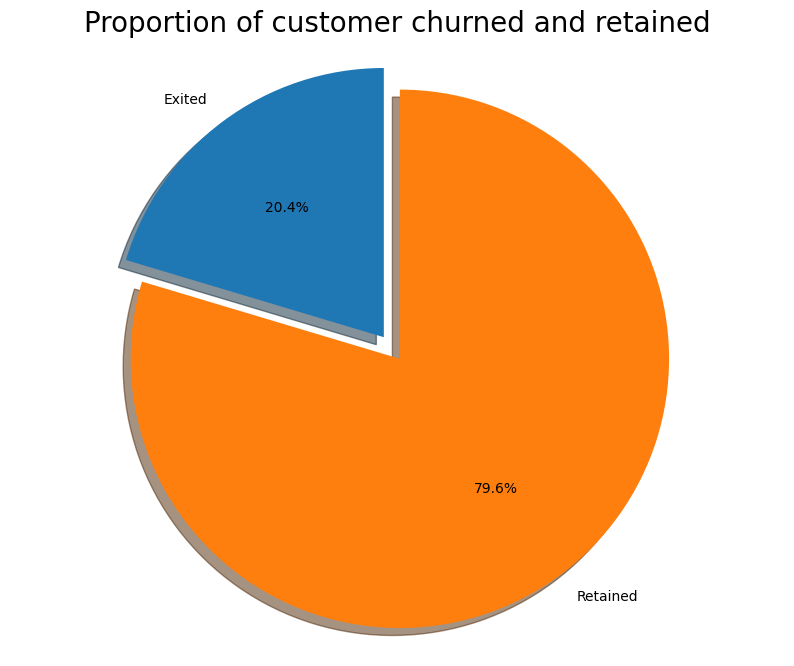

In [10]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [11]:
df['Exited'] = df['Exited'].astype(str)

<Axes: xlabel='IsActiveMember', ylabel='count'>

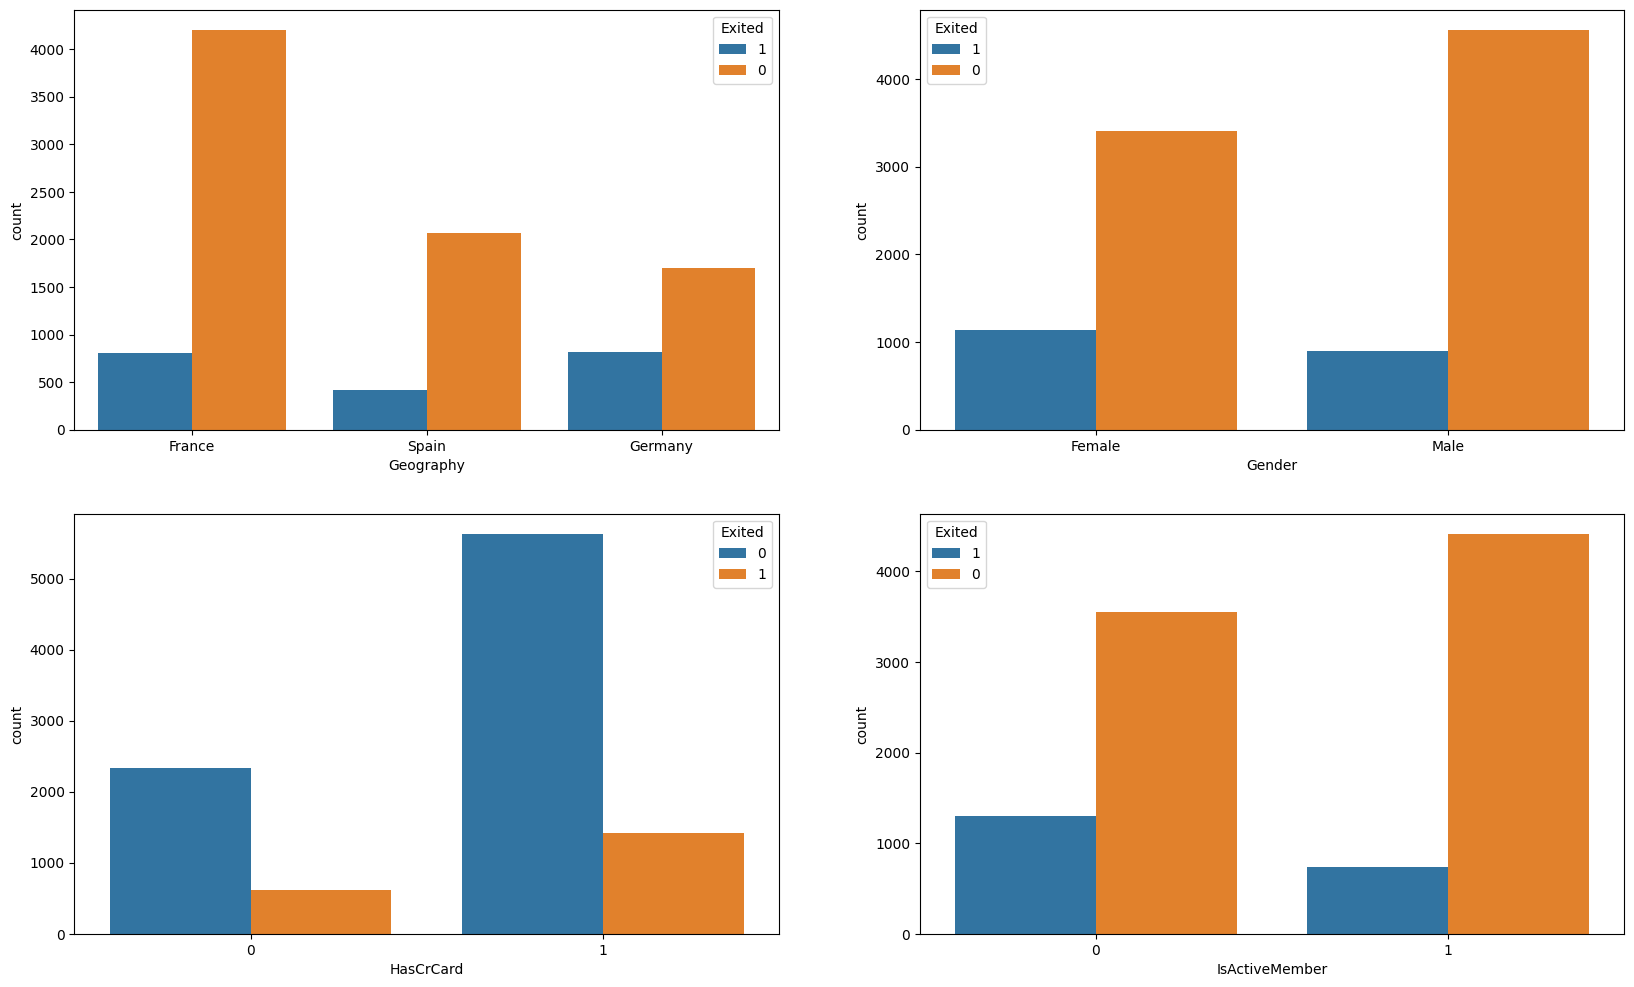

In [12]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

In [13]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1}) 

In [14]:
print(df)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France       1   42       2       0.00              1   
1             608     Spain       1   41       1   83807.86              1   
2             502    France       1   42       8  159660.80              3   
3             699    France       1   39       1       0.00              2   
4             850     Spain       1   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France       0   39       5       0.00              2   
9996          516    France       0   35      10   57369.61              1   
9997          709    France       1   36       7       0.00              1   
9998          772   Germany       0   42       3   75075.31              2   
9999          792    France       1   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary Exited  
0    

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

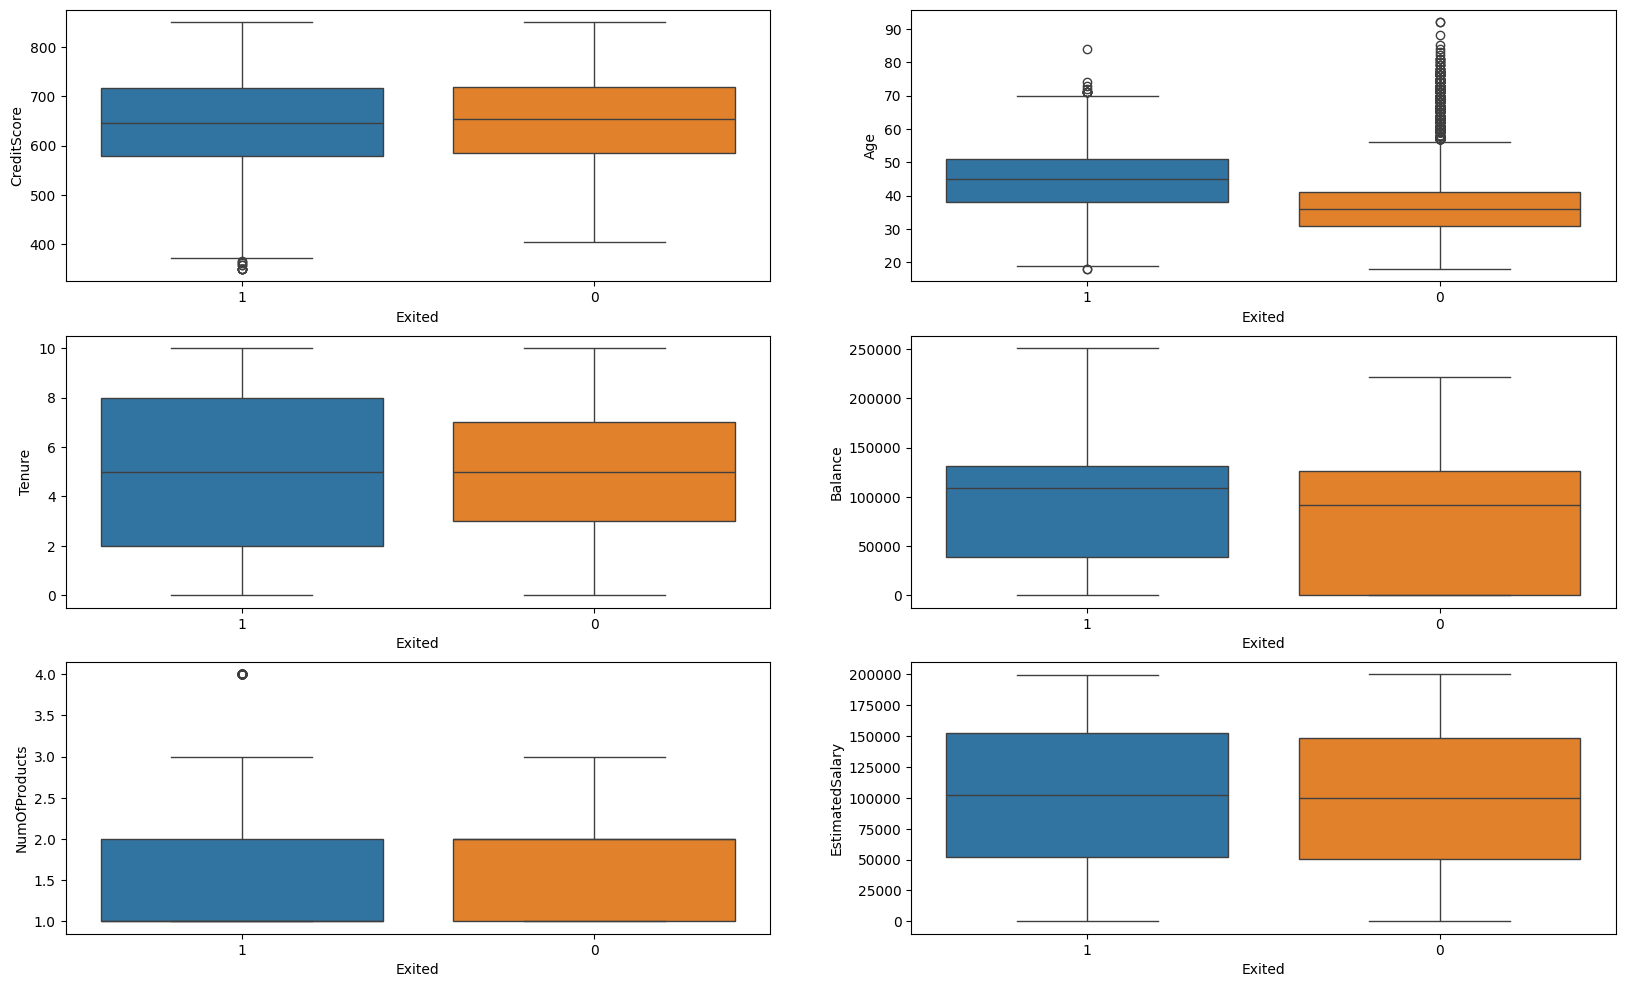

In [15]:
 fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

In [16]:
# Áp dụng hàm get_dummies()
df = pd.get_dummies(df, columns=['Geography']).astype(int)

In [17]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0,1,1,1,101348,1,1,0,0
1,608,1,41,1,83807,1,0,1,112542,0,0,0,1
2,502,1,42,8,159660,3,1,0,113931,1,1,0,0
3,699,1,39,1,0,2,0,0,93826,0,1,0,0
4,850,1,43,2,125510,1,1,1,79084,0,0,0,1


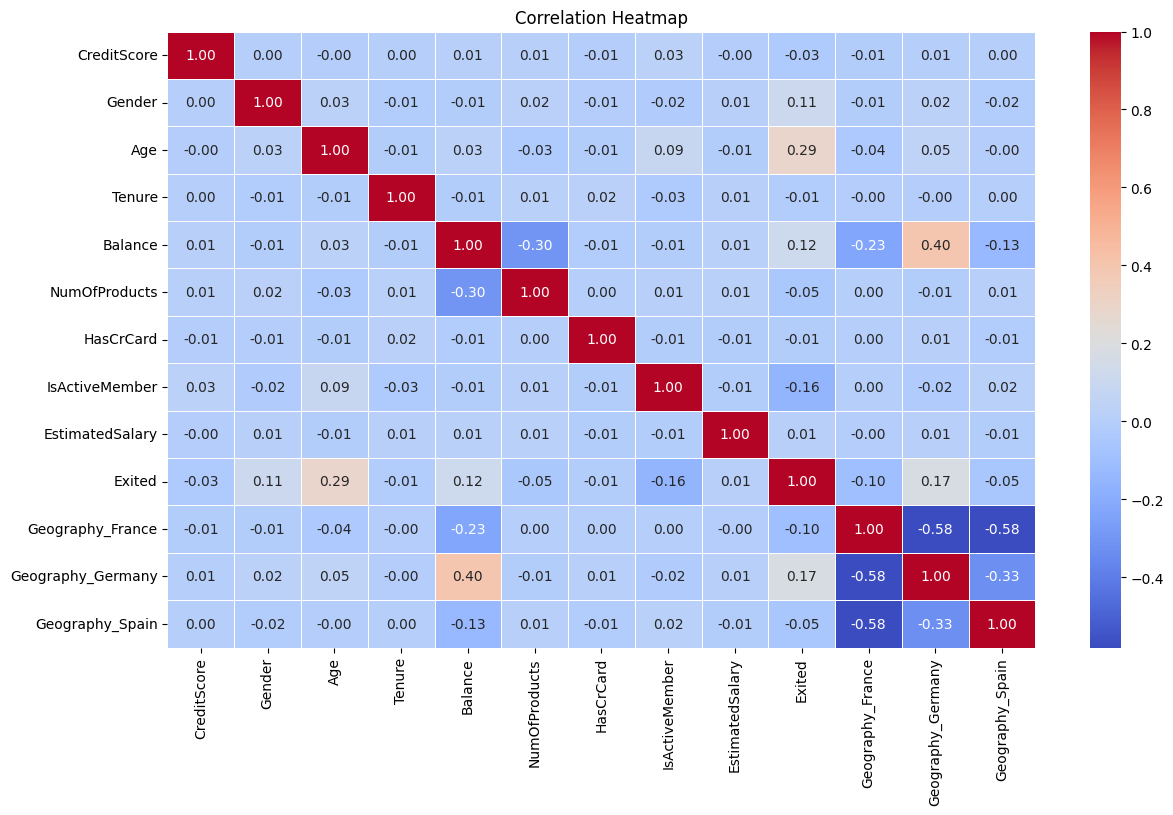

In [18]:
#Biểu đồ Heatmap của hàm tương quan Corr() thể hiện mối tương quan của các dữ liệu trong dataset
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

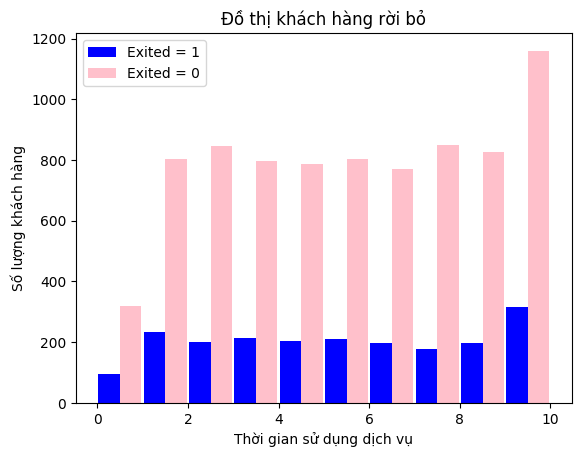

In [20]:
#Mô tả dữ liệu Exited theo thời gian sử dụng dịch vụ bằng hist
df['Exited'] = df['Exited'].astype(int)
tenure_exited_yes = df[df.Exited == 1].Tenure
tenure_exited_no = df[df.Exited == 0].Tenure

plt.xlabel("Thời gian sử dụng dịch vụ")
plt.ylabel("Số lượng khách hàng")
plt.title("Đồ thị khách hàng rời bỏ")

plt.hist([tenure_exited_yes, tenure_exited_no], rwidth=0.95, color=['blue', 'pink'], label=['Exited = 1','Exited = 0'])
plt.legend()
plt.show()

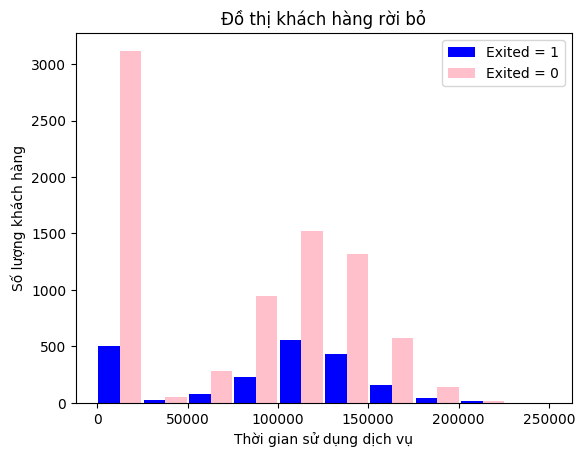

In [19]:
#Mô tả phân phối số dư tài khoản theo tỉ lệ rời bỏ
tenure_exited_yes = df[df.Exited == 1].Balance
tenure_exited_no = df[df.Exited == 0].Balance

plt.xlabel("Thời gian sử dụng dịch vụ")
plt.ylabel("Số lượng khách hàng")
plt.title("Đồ thị khách hàng rời bỏ")

plt.hist([tenure_exited_yes, tenure_exited_no], rwidth=0.95, color=['blue', 'pink'], label=['Exited = 1','Exited = 0'])
plt.legend()
plt.show()

In [20]:
# Chia dữ liệu thành features (X) và target (y)
x = df.drop('Exited', axis=1)
y = df['Exited']

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x1 = scaler.fit_transform(x)

In [22]:
x1

array([[0.538     , 1.        , 0.32432432, ..., 1.        , 0.        ,
        0.        ],
       [0.516     , 1.        , 0.31081081, ..., 0.        , 0.        ,
        1.        ],
       [0.304     , 1.        , 0.32432432, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.718     , 1.        , 0.24324324, ..., 1.        , 0.        ,
        0.        ],
       [0.844     , 0.        , 0.32432432, ..., 0.        , 1.        ,
        0.        ],
       [0.884     , 1.        , 0.13513514, ..., 1.        , 0.        ,
        0.        ]])

In [23]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression


In [25]:
from sklearn.metrics import accuracy_score,classification_report

In [26]:
#khởi tạo 
model= LogisticRegression()
#thực thi với dữ liệu trên
model.fit(X_train, y_train)
#dự đoán dữ liệu test
y_pred= model.predict(X_test)
#đánh giá kết quả của model
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.57      0.19      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



Confusion Matrix:
 [[1550   57]
 [ 318   75]]


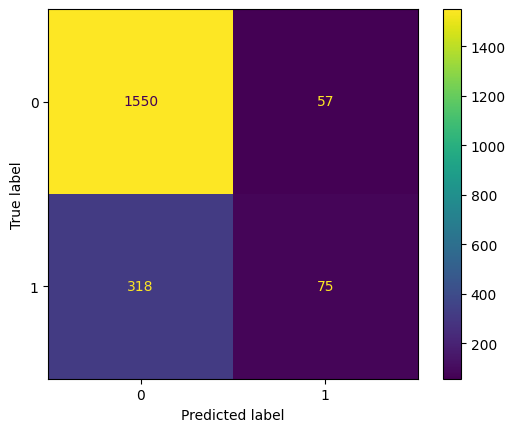

In [27]:
#đánh giá mô hình bằng Ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print ("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print (ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_test,y_pred)).plot())

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

Sổ dòng có Exited = 0 là 7963
Số dòng có Exited = 1 là 2037


<Axes: xlabel='Exited', ylabel='count'>

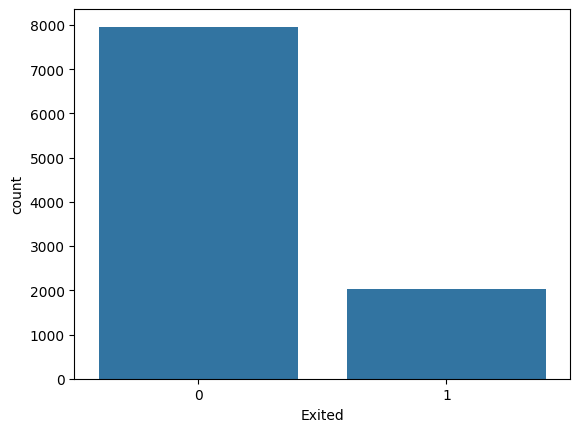

In [29]:
#Mô tả dữ liệu "Exited" bằng biểu đồ Countplot trong thư viện searbon 
exited0= df[df [ 'Exited']==0].shape[0] 
exited1 = df [df [ 'Exited']==1].shape[0]
print("Sổ dòng có Exited = 0 là", exited0)
print("Số dòng có Exited = 1 là", exited1) 
sns.countplot(x = 'Exited', data = df)

In [31]:
#sử dụng NearMiss 
dataset_dummy = pd.get_dummies (df)
#Xác định biến độc lập x và biến phụ thuộc y
x = dataset_dummy.drop (["Exited"],axis=1)
y = dataset_dummy ['Exited']
#Mã hóa dữ liệu x 
scaler= MinMaxScaler() 
x1 = scaler.fit_transform(x)
#Xử lý mất cân bằng dữ liệu 
from imblearn.under_sampling import NearMiss
nm = NearMiss() 
x_res, y_res = nm.fit_resample(x,y)
x_res.shape, y_res.shape

((4074, 12), (4074,))

In [32]:
#Chia bộ dữ liệu thành tập train và test với tỷ lệ 80:20 
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_res, y_res, test_size = 0.2, random_state = 42)
#Khởi tạo mô hình 
model =LogisticRegression () 
#Thực thi với tập train 
model.fit(x_train_2, y_train_2)
#Dự đoán dữ liệu test
y_pred = model.predict(x_test_2) 
#Đánh giá mô hình 
print (classification_report (y_test_2, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       443
           1       0.96      0.77      0.86       372

    accuracy                           0.88       815
   macro avg       0.90      0.87      0.88       815
weighted avg       0.89      0.88      0.88       815



Confusion Matrix: 
 [[431  12]
 [ 84 288]]


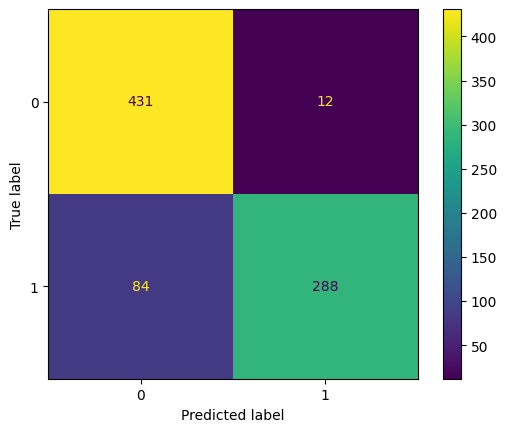

In [59]:
#Vẽ Lại ma trận nhầm lẫn sau khi xử lý cân bằng dữ liệu 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay 
print("Confusion Matrix: \n", confusion_matrix(y_test_2, y_pred))
print(ConfusionMatrixDisplay (confusion_matrix = confusion_matrix(y_test_2, y_pred)).plot())

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(x_train_2, y_train_2)

print("Best Parameters: ", grid_search.best_params_)

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\

Best Parameters:  {'C': 10, 'solver': 'newton-cg'}


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [36]:
#Chia bộ dữ liệu thành tập train và tập test với tỉ lệ 80:20
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_res, y_res, test_size = 0.2, random_state = 42)

#Khởi tạo mô hình
best_params = {'C' : 10, 'solver': 'newton-cg'}
model=LogisticRegression(**best_params)

#Thực thi với tập train
model.fit(x_train_2, y_train_2)

#Dự đoán dữ liệu test
y_pred = model.predict(x_test_2)

#Đánh giá mô hình
print(classification_report(y_test_2, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       443
           1       0.95      0.82      0.88       372

    accuracy                           0.90       815
   macro avg       0.91      0.89      0.90       815
weighted avg       0.91      0.90      0.90       815



C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [38]:
#Khai báo thư viện
from sklearn.ensemble import RandomForestClassifier

#Khai bao mô hình
RFM = RandomForestClassifier(random_state=3)

#Thực thi mô hình
RFM_model = RFM.fit(x_train_2, y_train_2)

#Dự báo mô hình
predictionRFM = RFM_model.predict(x_test_2)

#Đánh giá độ hiểu quả của mô hình
print(classification_report(y_test_2, predictionRFM))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       443
           1       0.92      0.86      0.89       372

    accuracy                           0.90       815
   macro avg       0.90      0.90      0.90       815
weighted avg       0.90      0.90      0.90       815



Confusion Matrix: 
 [[415  28]
 [ 53 319]]


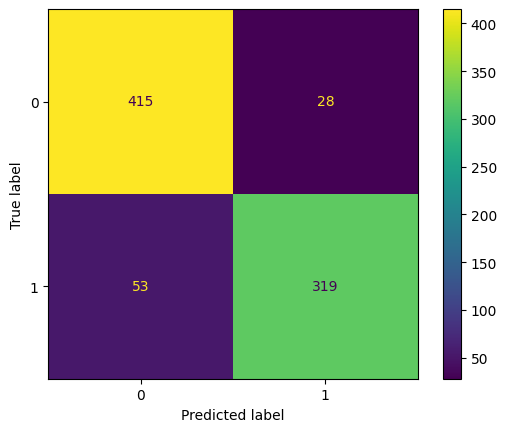

In [40]:
#Ma trận nhầm lẫn cho thuật toán RandomForest
print("Confusion Matrix: \n", confusion_matrix(y_test_2, predictionRFM))
print(ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test_2, predictionRFM)).plot())

Nhận xét mô hình bằng Random Forest đưa ra kết quả có độ chính xác cao, mô hình hoạt động tốt cả với lớp 0 và lớp 1.

In [44]:
#Khai báo thư viện
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Tạo ra các fold cho cross-validation
#số lượng Fold tạo ra là 5 fold, có sắp xếp lại dữ liệu, dữ liệu được lấy ngẫu nhiên
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#Tính giá trị độ chính xác của mỗi lần thử nghiệm trong cross-validation
scores = cross_val_score(RFM_model, X_train, y_train, cv=kf)

#In ra kết quả
print("Cross-validated accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validated accuracy scores: [0.86125  0.855    0.87125  0.851875 0.86875 ]
Mean accuracy: 0.8616250000000001


In [56]:
# - CreditScore = 700
# - Gender : 0
# - Age = 40
# - Tenure: 5
# - Balance: 200
# - NumofProducts: 2
# - HasCrCard: 1
# - IsActiveMeber: 1
# - EstimatedSalary: 350000
# - Geography_France: 0
# - Grography_Germany: 1
# - Geography_Spain: 0
x = [[700,1,40,5,200,2,1,1,350000,0,1,0]]
#Ghi theo đúng thứ tự [[]] (thể hiện là mảng 1 chiều: thể hiện 1 dòng (ngang))
predictionRFM = RFM_model.predict(x)
if predictionRFM == 1:
    print("Khách hàng có khả năng rời bỏ")
else:
    print("Khách hàng có khả năng không rời bỏ")

Khách hàng có khả năng không rời bỏ


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
